In [1]:
from pydub import AudioSegment

In [2]:
audio_1 = AudioSegment.from_file("Bhai Bhai.mp3")

In [3]:
print("Duration(ms):",len(audio_1))
print("Channels:",audio_1.channels)
print("Frame Rate:",audio_1.frame_rate)
print("Samples Width((bytes)):",audio_1.sample_width)
print("dBFS laverage Loudness:",audio_1.dBFS)

Duration(ms): 188688
Channels: 2
Frame Rate: 48000
Samples Width((bytes)): 2
dBFS laverage Loudness: -9.556485300899975


2. Slicing Audio(Show output)

In [4]:
first_5_sec = audio_1[:5000]
next_5_sec = audio_1[5000:10000]

In [5]:
print("First 5 sec duration:",len(first_5_sec))
print("Next 5 sec duration:",len(next_5_sec))

First 5 sec duration: 5000
Next 5 sec duration: 5000


In [6]:
#fade In/Fade Out
fade_in_clip = audio_1[:5000].fade_in(3000)
fade_out_clip = audio_1[:5000].fade_out(3000)

In [7]:
print("Fade in clip:",fade_in_clip)
print("Fade out clip:",fade_out_clip)

Fade in clip: <pydub.audio_segment.AudioSegment object at 0x0000019A2B9E9160>
Fade out clip: <pydub.audio_segment.AudioSegment object at 0x0000019A2B9EABA0>


In [8]:
combined = first_5_sec + next_5_sec
print("Combined length:",len(combined))

Combined length: 10000


In [9]:
#simple waveform plot using Librosa+ MAatplotlib
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [10]:
y,sr = librosa.load("Bhai Bhai.mp3",sr=None)

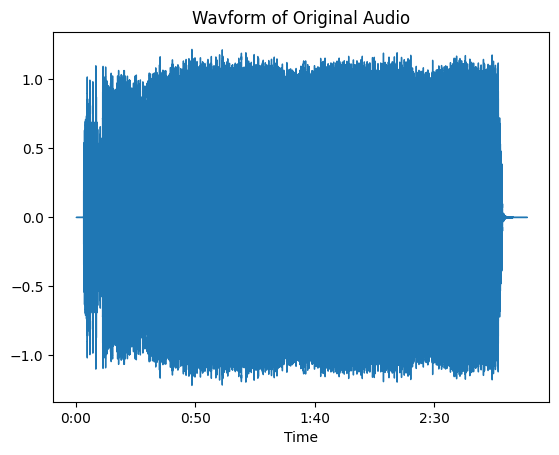

In [11]:
plt.Figure(figsize=(12,3))
librosa.display.waveshow(y,sr=sr)
plt.title("Wavform of Original Audio")
plt.show()

In [12]:
#visualize fade in and fade out
fade_in_audio = fade_in_clip.get_array_of_samples()
fade_out_audio = fade_out_clip.get_array_of_samples()

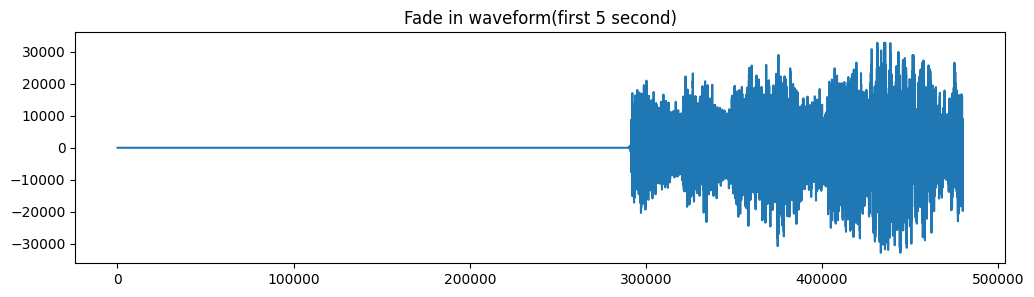

In [13]:
plt.figure(figsize=(12,3))
plt.plot(fade_in_audio)
plt.title("Fade in waveform(first 5 second)")
plt.show()

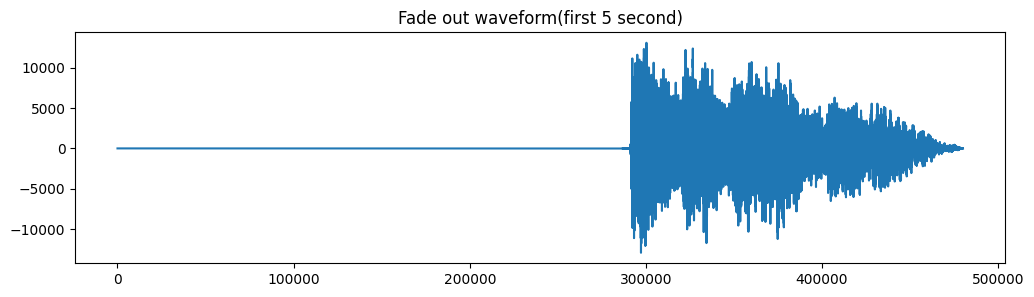

In [14]:
plt.figure(figsize=(12,3))
plt.plot(fade_out_audio)
plt.title("Fade out waveform(first 5 second)")
plt.show()

In [15]:
#logic
from pydub import AudioSegment
import os,random

In [18]:
def smooth_fade_mixtape(folder,output="output/mixtape.mp3",transition_ms=6000):
    files = [f for f in os.listdir(folder) if f.endswith((".mp3",".wav"))]
    random.shuffle(files)

    mixtape = None
    for i,file in enumerate(files):
        song = AudioSegment.from_file(os.path.join(folder,file))
        song = song.set_channels(2).set_frame_rate(44100)

        if mixtape is None:
            mixtape = song
        else:
            overlap = min(transition_ms,len(song),len(mixtape))
            outgoing = mixtape[-overlap:].fade_out(overlap).low_pass_filter(4000)

            incoming = song[:overlap].fade_in(overlap).low_pass_filter(4000)

            transition = outgoing.overlay(incoming)

            mixtape = mixtape[:-overlap] + transition + song[overlap:]

    mixtape.export(output,format="mp3")
    print(f"Smooth fade mixtape genrated:{output}")

In [19]:
smooth_fade_mixtape("mixtape")

Smooth fade mixtape genrated:output/mixtape.mp3


In [21]:
import os
from pydub import AudioSegment


def generate_youtube_description(folder, title="Afro House Mixtape"):
    
    # Fetch audio files
    files = [f for f in os.listdir(folder) if f.endswith((".mp3", ".wav"))]
    
    # Sort alphabetically (you can modify if needed)
    files.sort()

    tracklist = []
    timestamps = []

    current_time_ms = 0

    for index, file in enumerate(files):

        path = os.path.join(folder, file)
        audio = AudioSegment.from_file(path)

        duration_ms = len(audio)
        duration_sec = duration_ms // 1000

        # Format total timestamp position (MM:SS)
        total_seconds = current_time_ms // 1000
        start_min = total_seconds // 60
        start_sec = total_seconds % 60
        start_timestamp = f"{start_min:02d}:{start_sec:02d}"

        # Format individual track duration (MM:SS)
        minutes = duration_sec // 60
        seconds = duration_sec % 60
        duration_timestamp = f"{minutes:02d}:{seconds:02d}"

        # Clean title (remove extension)
        title_clean = os.path.splitext(file)[0]

        # Add to lists
        timestamps.append(f"{start_timestamp} - {title_clean}")
        tracklist.append(f"{index + 1}. {title_clean} ({duration_timestamp})")

        current_time_ms += duration_ms

    # Build the YouTube description
    description = f"""{title}

Curated Afro House Mix 🔥  
Vibes, drums, groove, and deep tribal rhythms.

━━━━━━━━━━━━━━━━━━
🎵 Tracklist & Timestamps
━━━━━━━━━━━━━━━━━━
""" + "\n".join(timestamps) + """

━━━━━━━━━━━━━━━━━━
🔥 Hashtags
━━━━━━━━━━━━━━━━━━
#AfroHouse #Amapiano #HouseMusic #DeepHouse 
#TribalHouse #Mixtape #DJMix #AfroTech #ElectronicMusic
"""

    return description



In [22]:
folder_path = "mixtape"

description_text = generate_youtube_description(folder_path)

print("\n===== YOUTUBE DESCRIPTION GENERATED =====\n")
print(description_text)



===== YOUTUBE DESCRIPTION GENERATED =====

Afro House Mixtape

Curated Afro House Mix 🔥  
Vibes, drums, groove, and deep tribal rhythms.

━━━━━━━━━━━━━━━━━━
🎵 Tracklist & Timestamps
━━━━━━━━━━━━━━━━━━
00:00 - song_1
02:43 - song_2

━━━━━━━━━━━━━━━━━━
🔥 Hashtags
━━━━━━━━━━━━━━━━━━
#AfroHouse #Amapiano #HouseMusic #DeepHouse 
#TribalHouse #Mixtape #DJMix #AfroTech #ElectronicMusic

